# Running

## Loading

In [1]:
# not !run
# load libraries, and the agent class
%run "../SMB_iterate.py"

# Action space

Below are the available buttons, as per `nes_py/wrappers/joypad_space.py`. Note that this follows the same ordering convention as we will observe later on for the TAS input file format.

```python
class JoypadSpace(Wrapper):
    """An environment wrapper to convert binary to discrete action space."""

    # a mapping of buttons to binary values
    _button_map = {
        'right':  0b10000000,
        'left':   0b01000000,
        'down':   0b00100000,
        'up':     0b00010000,
        'start':  0b00001000,
        'select': 0b00000100,
        'B':      0b00000010,
        'A':      0b00000001,
        'NOOP':   0b00000000,
    }
```

The gymnasium package has provided a few different preconfigured movement options that are combinations of these buttons. These options are provided as a list of lists, with each element in the sub list being a suitable action, eg., `[['right'], ['right', 'B']]`. 

Of the pre-provided options, `COMPLEX_MOVEMENT` has the largest. But, it should be noted that this still does not include the full range of actions, eg., `['up', 'A']` is not included as an action. 

Of course, we can imagine that not all actions *should* not necessarily be explored. But, the question is to what extent we want to manage that externally versus allowing the reinforcement learning agent establish good versus bad actions implicitly. 

Below are the preconfigured lists of actions made available in the environment.

In [2]:
_ = gym_super_mario_bros.actions.COMPLEX_MOVEMENT
print(len(_))
_

12


[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left'],
 ['left', 'A'],
 ['left', 'B'],
 ['left', 'A', 'B'],
 ['down'],
 ['up']]

In [3]:
_ = gym_super_mario_bros.actions.RIGHT_ONLY
print(len(_))
_

5


[['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B']]

In [4]:
_ = gym_super_mario_bros.actions.SIMPLE_MOVEMENT
print(len(_))
_

7


[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

But, we can just as easily create our own curated lists, including a complete `actionSpace`.

In [5]:
# with thanks to: https://www.geeksforgeeks.org/python/python-itertools-combinations-function/
from itertools import combinations

# 8 binary options => 2^8 combinations
ALL_BUTTONS = ['right', 'left', 'down', 'up', 'start', 'select', 'B', 'A']

actionSpace = ["NOOP"] 
for i in range(1, len(ALL_BUTTONS) + 1): # do not include the empty permutation
                                         # already included above
    for j in combinations(ALL_BUTTONS, i):
        actionSpace.append(list(j))

print(f"{len(actionSpace)=}")

len(actionSpace)=256


In [6]:
actionSpace[0:9]

['NOOP',
 ['right'],
 ['left'],
 ['down'],
 ['up'],
 ['start'],
 ['select'],
 ['B'],
 ['A']]

In [7]:
actionSpace[-9:]

[['right', 'left', 'down', 'up', 'start', 'select', 'B'],
 ['right', 'left', 'down', 'up', 'start', 'select', 'A'],
 ['right', 'left', 'down', 'up', 'start', 'B', 'A'],
 ['right', 'left', 'down', 'up', 'select', 'B', 'A'],
 ['right', 'left', 'down', 'start', 'select', 'B', 'A'],
 ['right', 'left', 'up', 'start', 'select', 'B', 'A'],
 ['right', 'down', 'up', 'start', 'select', 'B', 'A'],
 ['left', 'down', 'up', 'start', 'select', 'B', 'A'],
 ['right', 'left', 'down', 'up', 'start', 'select', 'B', 'A']]

## Choice of action space

Using the complete action space is expected to result in very poor performance as it will significantly increase the space to explore.

Nonetheless, we will calculate it for reference, perhaps useful.

In [8]:
ALL_BUTTONS = ['right', 'left', 'down', 'up', 'start', 'select', 'B', 'A']
ALL_SINGLE_ACTIONS = ALL_BUTTONS.copy()
ALL_SINGLE_ACTIONS.append("NOOP")
COMPLETE_ACTIONSPACE = [ ["NOOP"] ] # note use of a list of lists 
for i in range(1, len(ALL_BUTTONS) + 1): # do not include the empty permutation
                                         # already included above
    for j in combinations(ALL_BUTTONS, i):
        COMPLETE_ACTIONSPACE.append(list(list(j)))

In [9]:
a = Agent(COMPLETE_ACTIONSPACE)
print(a)

/home/dss2q/.local/lib/python3.12/site-packages/gymnasium/envs/registration.py:512: DeprecationWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.deprecation(


actionSpace is long, (length: 256), showing first 5 and last 5 entries:
[['NOOP'], ['right'], ['left'], ['down'], ['up']]
 ... 
 [['right', 'left', 'down', 'start', 'select', 'B', 'A'], ['right', 'left', 'up', 'start', 'select', 'B', 'A'], ['right', 'down', 'up', 'start', 'select', 'B', 'A'], ['left', 'down', 'up', 'start', 'select', 'B', 'A'], ['right', 'left', 'down', 'up', 'start', 'select', 'B', 'A']]
self.seed=5004
self.step=-1
self.cumulativeReward=0
Latest state:
None


In [10]:
gym_super_mario_bros.env.reset?

Object `gym_super_mario_bros.env.reset` not found.


In [11]:
a.iterate(policy = "random", maxSteps = 5_001, saveImage = False)

self.step=0000000, self.cumulativeReward=0.0, info['coins']=0, info['time']=400
self.step=0001000, self.cumulativeReward=528.0, info['coins']=0, info['time']=374
self.step=0002000, self.cumulativeReward=503.0, info['coins']=0, info['time']=349
self.step=0003000, self.cumulativeReward=472.0, info['coins']=0, info['time']=325
self.step=0004000, self.cumulativeReward=454.0, info['coins']=0, info['time']=300
self.step=0005000, self.cumulativeReward=429.0, info['coins']=0, info['time']=275


In [12]:
df = a.actionDF()

df

,a0,a1,a2,a3,a4,a5,a6,a7,action,buttonCount
0,right,left,start,B,,,,,"right,left,start,B",4
1,down,start,A,,,,,,"down,start,A",3
2,right,left,start,,,,,,"right,left,start",3
3,up,start,select,B,,,,,"up,start,select,B",4
4,down,B,A,,,,,,"down,B,A",3
...,...,...,...,...,...,...,...,...,...,...
4996,right,down,up,select,B,,,,"right,down,up,select,B",5
4997,right,up,start,B,,,,,"right,up,start,B",4
4998,left,down,start,A,,,,,"left,down,start,A",4
4999,right,left,down,up,start,A,,,"right,left,down,up,start,A",6


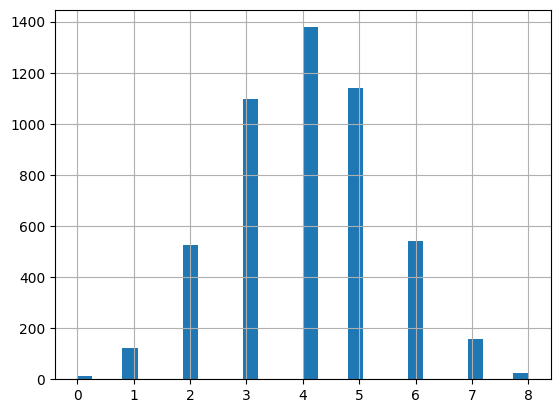

In [13]:
df['buttonCount'].hist(bins = 30);

A plot of the number of times that an action was taken. Just a validation that it appears to be somewhat uniform, in the exploration of actions.

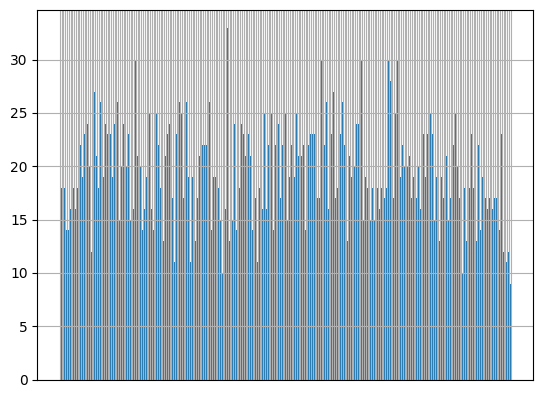

In [14]:
plot = df['action'].hist(bins = 256)

# heavily overplotted x-axis removed as per:
# https://stackoverflow.com/questions/58476654/how-to-remove-or-hide-x-axis-labels-from-a-plot
plot.set(xlabel=None);
plot.set(xticklabels=[]);
plot.tick_params(bottom = False);

# TODO

might be nice to have a plot of actions. 

Or a plot of boxes for each action sequence? run-length encoding?

# Scratch

# Note on AI usage

Generative AI was not used in the creation of this document and explanation as of 2025-10-20.